In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/dataset_arredondado_unidades.csv', sep=';')
df

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
0,05_12_2022_09_05_31,94.0,64.0,64.0,74.0,0.0,0.0,36.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
1,05_12_2022_09_21_59,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2,05_12_2022_09_27_23,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
3,05_12_2022_09_32_47,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
4,05_12_2022_09_38_11,89.0,64.0,64.0,71.0,0.0,21.0,38.0,0.0,44.0,0.0,13.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,08_02_2023_14_06_06,44.0,86.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,49.0,93.0,37.0,64.0,96.0,95.0,95.0
9458,08_02_2023_14_11_06,44.0,85.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,41.0,93.0,37.0,64.0,96.0,95.0,95.0
9459,08_02_2023_14_16_06,44.0,85.0,90.0,28.0,21.0,85.0,92.0,89.0,94.0,95.0,92.0,42.0,93.0,37.0,64.0,96.0,95.0,95.0
9460,08_02_2023_14_21_06,44.0,86.0,90.0,28.0,22.0,85.0,92.0,89.0,94.0,95.0,92.0,36.0,93.0,37.0,64.0,96.0,95.0,95.0


In [ ]:
df.index = pd.to_datetime(df['Time'], format='%d_%m_%Y_%H_%M_%S')
df[:26]

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
Time,,,,,,,,,,,,,,,,,,,
2022-12-05 09:05:31,05_12_2022_09_05_31,94.0,64.0,64.0,74.0,0.0,0.0,36.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
2022-12-05 09:21:59,05_12_2022_09_21_59,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:27:23,05_12_2022_09_27_23,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:32:47,05_12_2022_09_32_47,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:38:11,05_12_2022_09_38_11,89.0,64.0,64.0,71.0,0.0,21.0,38.0,0.0,44.0,0.0,13.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
2022-12-05 10:57:17,05_12_2022_10_57_17,88.0,66.0,61.0,79.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,0.0,68.0,98.0,77.0,94.0,100.0,100.0
2022-12-05 11:02:41,05_12_2022_11_02_41,89.0,66.0,61.0,79.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,0.0,68.0,98.0,77.0,94.0,100.0,100.0
2022-12-05 11:08:05,05_12_2022_11_08_05,89.0,66.0,61.0,77.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,1.0,67.0,97.0,77.0,94.0,100.0,100.0
2022-12-05 11:13:29,05_12_2022_11_13_29,88.0,62.0,61.0,76.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,0.0,68.0,98.0,77.0,94.0,100.0,100.0


In [ ]:
column_to_remove = ['Time']
df = df.drop(column_to_remove, axis=1) #Remover a coluna date time já que esta se encontra indexada
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
Time,,,,,,,,,,,,,,,,,,
2022-12-05 09:05:31,94.0,64.0,64.0,74.0,0.0,0.0,36.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
2022-12-05 09:21:59,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:27:23,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:32:47,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:38:11,89.0,64.0,64.0,71.0,0.0,21.0,38.0,0.0,44.0,0.0,13.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 14:06:06,44.0,86.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,49.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:11:06,44.0,85.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,41.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:16:06,44.0,85.0,90.0,28.0,21.0,85.0,92.0,89.0,94.0,95.0,92.0,42.0,93.0,37.0,64.0,96.0,95.0,95.0


In [ ]:
level_F1 = df['F1']
level_F1 = pd.concat([ level_F1, df['F2']], axis=1)
level_F1 = pd.concat([ level_F1, df['F3']], axis=1)
level_F1 = pd.concat([ level_F1, df['F6']], axis=1)
level_F1 = pd.concat([ level_F1, df['F8']], axis=1)
level_F1 = pd.concat([ level_F1, df['F9']], axis=1)
level_F1 = pd.concat([ level_F1, df['F10']], axis=1)
level_F1 = pd.concat([ level_F1, df['F13']], axis=1)
level_F1 = pd.concat([ level_F1, df['F14']], axis=1)
level_F1 = pd.concat([ level_F1, df['F15']], axis=1)
level_F1 = pd.concat([ level_F1, df['F16']], axis=1)
level_F1 = pd.concat([ level_F1, df['F17']], axis=1)
level_F1 = pd.concat([ level_F1, df['F18']], axis=1)
level_F1

,F1,F2,F3,F6,F8,F9,F10,F13,F14,F15,F16,F17,F18
Time,,,,,,,,,,,,,
2022-12-05 09:05:31,94.0,64.0,64.0,0.0,0.0,50.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
2022-12-05 09:21:59,90.0,65.0,65.0,21.0,0.0,46.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:27:23,90.0,65.0,65.0,21.0,0.0,46.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:32:47,90.0,65.0,65.0,21.0,0.0,46.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:38:11,89.0,64.0,64.0,21.0,0.0,44.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 14:06:06,44.0,86.0,90.0,85.0,89.0,94.0,95.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:11:06,44.0,85.0,90.0,85.0,89.0,94.0,95.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:16:06,44.0,85.0,90.0,85.0,89.0,94.0,95.0,93.0,37.0,64.0,96.0,95.0,95.0


In [ ]:
def df_to_X_y(df, window_size=14):
  df_as_np = df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X, y = df_to_X_y(level_F1)
X.shape, y.shape

((9448, 14, 13), (9448, 13))

In [ ]:
train_size = int(0.7 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + int((X.shape[0]-train_size)/2)], y[train_size:train_size + int(int((X.shape[0]-train_size)/2))]
X_test, y_test = X[train_size + int((X.shape[0]-train_size)/2):], y[train_size + int((X.shape[0]-train_size)/2):]

X_train.shape, y_train.shape, X_val.shape, y_val.shape,X_test.shape, y_test.shape

((6613, 14, 13),
 (6613, 13),
 (1417, 14, 13),
 (1417, 13),
 (1418, 14, 13),
 (1418, 13))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((14,13)))
model.add(GRU(256))
model.add(Dropout(0.1))
model.add(Dense(32,'relu'))
model.add(Dense(13,'linear'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               208128    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 13)                429       
                                                                 
Total params: 216,781
Trainable params: 216,781
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train,y_train, batch_size =32, validation_data=(X_val,y_val),epochs=15,callbacks=[cp1])

Epoch 1/15
206/207 [============================>.] - ETA: 0s - loss: 1926.6782 - root_mean_squared_error: 43.8939

207/207 [==============================] - 18s 71ms/step - loss: 1922.8612 - root_mean_squared_error: 43.8504 - val_loss: 773.1094 - val_root_mean_squared_error: 27.8048
Epoch 2/15
207/207 [==============================] - ETA: 0s - loss: 627.0419 - root_mean_squared_error: 25.0408

207/207 [==============================] - 8s 41ms/step - loss: 627.0419 - root_mean_squared_error: 25.0408 - val_loss: 526.3447 - val_root_mean_squared_error: 22.9422
Epoch 3/15
206/207 [============================>.] - ETA: 0s - loss: 374.9047 - root_mean_squared_error: 19.3625

207/207 [==============================] - 8s 40ms/step - loss: 374.6754 - root_mean_squared_error: 19.3565 - val_loss: 371.4025 - val_root_mean_squared_error: 19.2718
Epoch 4/15
207/207 [==============================] - ETA: 0s - loss: 235.7643 - root_mean_squared_error: 15.3546

207/207 [==============================] - 8s 36ms/step - loss: 235.7643 - root_mean_squared_error: 15.3546 - val_loss: 273.0877 - val_root_mean_squared_error: 16.5254
Epoch 5/15
207/207 [==============================] - ETA: 0s - loss: 142.8834 - root_mean_squared_error: 11.9534

207/207 [==============================] - 9s 42ms/step - loss: 142.8834 - root_mean_squared_error: 11.9534 - val_loss: 203.4821 - val_root_mean_squared_error: 14.2647
Epoch 6/15
206/207 [============================>.] - ETA: 0s - loss: 100.9154 - root_mean_squared_error: 10.0457

207/207 [==============================] - 8s 40ms/step - loss: 100.9022 - root_mean_squared_error: 10.0450 - val_loss: 161.9256 - val_root_mean_squared_error: 12.7250
Epoch 7/15
206/207 [============================>.] - ETA: 0s - loss: 80.1912 - root_mean_squared_error: 8.9550

207/207 [==============================] - 8s 40ms/step - loss: 80.2086 - root_mean_squared_error: 8.9559 - val_loss: 134.7068 - val_root_mean_squared_error: 11.6063
Epoch 8/15
206/207 [============================>.] - ETA: 0s - loss: 68.3059 - root_mean_squared_error: 8.2647

207/207 [==============================] - 8s 40ms/step - loss: 68.2265 - root_mean_squared_error: 8.2599 - val_loss: 118.2593 - val_root_mean_squared_error: 10.8747
Epoch 9/15
205/207 [============================>.] - ETA: 0s - loss: 60.6723 - root_mean_squared_error: 7.7892

207/207 [==============================] - 9s 42ms/step - loss: 60.7102 - root_mean_squared_error: 7.7917 - val_loss: 107.4368 - val_root_mean_squared_error: 10.3652
Epoch 10/15
205/207 [============================>.] - ETA: 0s - loss: 54.8629 - root_mean_squared_error: 7.4070

207/207 [==============================] - 8s 39ms/step - loss: 54.9275 - root_mean_squared_error: 7.4113 - val_loss: 93.8539 - val_root_mean_squared_error: 9.6878
Epoch 11/15
205/207 [============================>.] - ETA: 0s - loss: 51.1919 - root_mean_squared_error: 7.1549

207/207 [==============================] - 8s 36ms/step - loss: 51.1169 - root_mean_squared_error: 7.1496 - val_loss: 92.4701 - val_root_mean_squared_error: 9.6161
Epoch 12/15
206/207 [============================>.] - ETA: 0s - loss: 48.4360 - root_mean_squared_error: 6.9596

207/207 [==============================] - 9s 43ms/step - loss: 48.4697 - root_mean_squared_error: 6.9620 - val_loss: 84.6333 - val_root_mean_squared_error: 9.1996
Epoch 13/15
205/207 [============================>.] - ETA: 0s - loss: 46.9166 - root_mean_squared_error: 6.8496

207/207 [==============================] - 8s 39ms/step - loss: 46.9296 - root_mean_squared_error: 6.8505 - val_loss: 82.8434 - val_root_mean_squared_error: 9.1018
Epoch 14/15
206/207 [============================>.] - ETA: 0s - loss: 44.9416 - root_mean_squared_error: 6.7038

207/207 [==============================] - 8s 38ms/step - loss: 44.8963 - root_mean_squared_error: 6.7005 - val_loss: 79.0960 - val_root_mean_squared_error: 8.8936
Epoch 15/15
206/207 [============================>.] - ETA: 0s - loss: 43.8279 - root_mean_squared_error: 6.6203

207/207 [==============================] - 8s 40ms/step - loss: 43.8513 - root_mean_squared_error: 6.6220 - val_loss: 74.6886 - val_root_mean_squared_error: 8.6423


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

def smape_adjusted(a, f):
    return (1/a.size * np.sum(np.abs(f-a) / (np.abs(a) + np.abs(f))*100))

def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f1_preds = predictions[:, 0]
  f1_actuals = y[:, 0]

  f1_preds = np.nan_to_num(f1_preds, nan=0.0)

  df = pd.DataFrame(data={'F1 Predictions': f1_preds,
                          'F1 Actuals':f1_actuals,
                          })
  plt.plot(df['F1 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F1 Actuals'][start:end], label= 'Valores reais')
  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  mape_value = mape(df['F1 Actuals'], df['F1 Predictions'])
  smape_value = smape_adjusted(df['F1 Actuals'], df['F1 Predictions'])
  rmse_value = rmse(df['F1 Actuals'], df['F1 Predictions'])
  mae_value = mae(df['F1 Actuals'], df['F1 Predictions'])

  print("MAE:", mae_value)

  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  return df[start:end]

#train_predictions = model.predict(X_test).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
#train_results

def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f2_preds = predictions[:, 1]
  f2_actuals =  y[:, 1]


  f2_preds = np.nan_to_num(f2_preds, nan=0.0)

  df = pd.DataFrame(data={'F2 Predictions': f2_preds,
                          'F2 Actuals': f2_actuals
                          })
  plt.plot(df['F2 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F2 Actuals'][start:end], label = 'Valores reais')
  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f2_actuals), np.round(f2_preds), average='weighted')
  #recall = recall_score(np.round(f2_actuals), np.round(f2_preds), average='weighted')
  #f1 = f1_score(np.round(f2_actuals), np.round(f2_preds), average='weighted')

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  mape_value = mape(df['F2 Actuals'], df['F2 Predictions'])
  smape_value = smape_adjusted(df['F2 Actuals'], df['F2 Predictions'])
  rmse_value = rmse(df['F2 Actuals'], df['F2 Predictions'])
  mae_value = mae(df['F2 Actuals'], df['F2 Predictions'])

  print("MAE:", mae_value)

  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)
  return df[start:end]

def plot_predictions3(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f3_preds = predictions[:, 2]
  f3_actuals =  y[:, 2]

  f3_preds = np.nan_to_num(f3_preds, nan=0.0)

  df = pd.DataFrame(data={'F3 Predictions': f3_preds,
                          'F3 Actuals': f3_actuals
                          })
  plt.plot(df['F3 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F3 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f3_actuals), np.round(f3_preds), average='weighted')
  #recall = recall_score(np.round(f3_actuals), np.round(f3_preds), average='weighted')
  #f1 = f1_score(np.round(f3_actuals), np.round(f3_preds), average='weighted')
  mape_value = mape(df['F3 Actuals'], df['F3 Predictions'])
  smape_value = smape_adjusted(df['F3 Actuals'], df['F3 Predictions'])
  rmse_value = rmse(df['F3 Actuals'], df['F3 Predictions'])
  mae_value = mae(df['F3 Actuals'], df['F3 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)
  print("SMAPE", smape_value)
  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions4(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f6_preds = predictions[:, 3]
  f6_actuals =  y[:, 3]

  f6_preds = np.nan_to_num(f6_preds, nan=0.0)

  df = pd.DataFrame(data={'F6 Predictions': f6_preds,
                          'F6 Actuals': f6_actuals
                          })
  plt.plot(df['F6 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F6 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f6_actuals), np.round(f6_preds), average='weighted')
  #recall = recall_score(np.round(f6_actuals), np.round(f6_preds), average='weighted')
  #f1 = f1_score(np.round(f6_actuals), np.round(f6_preds), average='weighted')

  mape_value = mape(df['F6 Actuals'], df['F6 Predictions'])
  smape_value = smape_adjusted(df['F6 Actuals'], df['F6 Predictions'])
  rmse_value = rmse(df['F6 Actuals'], df['F6 Predictions'])
  mae_value = mae(df['F6 Actuals'], df['F6 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)

  return df[start:end]

def plot_predictions5(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f8_preds = predictions[:, 4]
  f8_actuals =  y[:, 4]

  f8_preds = np.nan_to_num(f8_preds, nan=0.0)

  df = pd.DataFrame(data={'F8 Predictions': f8_preds,
                          'F8 Actuals': f8_actuals
                          })
  plt.plot(df['F8 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F8 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()
  #precision = precision_score(np.round(f8_actuals), np.round(f8_preds), average='weighted')
  #recall = recall_score(np.round(f8_actuals), np.round(f8_preds), average='weighted')
  #f1 = f1_score(np.round(f8_actuals), np.round(f8_preds), average='weighted')
  mape_value = mape(df['F8 Actuals'], df['F8 Predictions'])
  smape_value = smape_adjusted(df['F8 Actuals'], df['F8 Predictions'])
  rmse_value = rmse(df['F8 Actuals'], df['F8 Predictions'])
  mae_value = mae(df['F8 Actuals'], df['F8 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions6(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f9_preds = predictions[:, 5]
  f9_actuals =  y[:, 5]

  f9_preds = np.nan_to_num(f9_preds, nan=0.1)

  df = pd.DataFrame(data={'F9 Predictions': f9_preds,
                          'F9 Actuals': f9_actuals
                          })
  plt.plot(df['F9 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F9 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f9_actuals), np.round(f9_preds), average='weighted')
  #recall = recall_score(np.round(f9_actuals), np.round(f9_preds), average='weighted')
  #f1 = f1_score(np.round(f9_actuals), np.round(f9_preds), average='weighted')
  mape_value = mape(df['F9 Actuals'], df['F9 Predictions'])
  smape_value = smape_adjusted(df['F9 Actuals'], df['F9 Predictions'])
  rmse_value = rmse(df['F9 Actuals'], df['F9 Predictions'])
  mae_value = mae(df['F9 Actuals'], df['F9 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)

  return df[start:end]

def plot_predictions7(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f10_preds = predictions[:, 6]
  f10_actuals =  y[:, 6]

  f10_preds = np.nan_to_num(f10_preds, nan=0.0)

  df = pd.DataFrame(data={'F10 Predictions': f10_preds,
                          'F10 Actuals': f10_actuals
                          })
  plt.plot(df['F10 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F10 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f10_actuals), np.round(f10_preds), average='weighted')
  #recall = recall_score(np.round(f10_actuals), np.round(f10_preds), average='weighted')
  #f1 = f1_score(np.round(f10_actuals), np.round(f10_preds), average='weighted')
  mape_value = mape(df['F10 Actuals'], df['F10 Predictions'])
  smape_value = smape_adjusted(df['F10 Actuals'], df['F10 Predictions'])
  rmse_value = rmse(df['F10 Actuals'], df['F10 Predictions'])
  mae_value = mae(df['F10 Actuals'], df['F10 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions8(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f13_preds = predictions[:, 7]
  f13_actuals =  y[:, 7]

  f13_preds = np.nan_to_num(f13_preds, nan=0.0)

  df = pd.DataFrame(data={'F13 Predictions': f13_preds,
                          'F13 Actuals': f13_actuals
                          })
  plt.plot(df['F13 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F13 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f13_actuals), np.round(f13_preds), average='weighted')
  #recall = recall_score(np.round(f13_actuals), np.round(f13_preds), average='weighted')
  #f1 = f1_score(np.round(f13_actuals), np.round(f13_preds), average='weighted')
  mape_value = mape(df['F13 Actuals'], df['F13 Predictions'])
  smape_value = smape_adjusted(df['F13 Actuals'], df['F13 Predictions'])
  rmse_value = rmse(df['F13 Actuals'], df['F13 Predictions'])
  mae_value = mae(df['F13 Actuals'], df['F13 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions9(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f14_preds = predictions[:, 8]
  f14_actuals =  y[:, 8]

  f14_preds = np.nan_to_num(f14_preds, nan=0.0)

  df = pd.DataFrame(data={'F14 Predictions': f14_preds,
                          'F14 Actuals': f14_actuals
                          })
  plt.plot(df['F14 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F14 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f14_actuals), np.round(f14_preds), average='weighted')
  #recall = recall_score(np.round(f14_actuals), np.round(f14_preds), average='weighted')
  #f1 = f1_score(np.round(f14_actuals), np.round(f14_preds), average='weighted')
  mape_value = mape(df['F14 Actuals'], df['F14 Predictions'])
  smape_value = smape_adjusted(df['F14 Actuals'], df['F14 Predictions'])
  rmse_value = rmse(df['F14 Actuals'], df['F14 Predictions'])
  mae_value = mae(df['F14 Actuals'], df['F14 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions10(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f15_preds = predictions[:, 9]
  f15_actuals =  y[:, 9]

  f15_preds = np.nan_to_num(f15_preds, nan=0.0)

  df = pd.DataFrame(data={'F15 Predictions': f15_preds,
                          'F15 Actuals': f15_actuals
                          })
  plt.plot(df['F15 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F15 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f15_actuals), np.round(f15_preds), average='weighted')
  #recall = recall_score(np.round(f15_actuals), np.round(f15_preds), average='weighted')
  #f1 = f1_score(np.round(f15_actuals), np.round(f15_preds), average='weighted')

  mape_value = mape(df['F15 Actuals'], df['F15 Predictions'])
  smape_value = smape_adjusted(df['F15 Actuals'], df['F15 Predictions'])
  rmse_value = rmse(df['F15 Actuals'], df['F15 Predictions'])
  mae_value = mae(df['F15 Actuals'], df['F15 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("MAPE", mape_value)
  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions11(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f16_preds = predictions[:, 10]
  f16_actuals =  y[:, 10]

  f16_preds = np.nan_to_num(f16_preds, nan=0.0)

  df = pd.DataFrame(data={'F16 Predictions': f16_preds,
                          'F16 Actuals': f16_actuals
                          })
  plt.plot(df['F16 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F16 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f16_actuals), np.round(f16_preds), average='weighted')
  #recall = recall_score(np.round(f16_actuals), np.round(f16_preds), average='weighted')
  #f1 = f1_score(np.round(f16_actuals), np.round(f16_preds), average='weighted')
  mape_value = mape(df['F16 Actuals'], df['F16 Predictions'])
  smape_value = smape_adjusted(df['F16 Actuals'], df['F16 Predictions'])
  rmse_value = rmse(df['F16 Actuals'], df['F16 Predictions'])
  mae_value = mae(df['F16 Actuals'], df['F16 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions12(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f17_preds = predictions[:, 11]
  f17_actuals =  y[:, 11]

  f17_preds = np.nan_to_num(f17_preds, nan=0.0)

  df = pd.DataFrame(data={'F17 Predictions': f17_preds,
                          'F17 Actuals': f17_actuals
                          })
  plt.plot(df['F17 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F17 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f17_actuals), np.round(f17_preds), average='weighted')
  #recall = recall_score(np.round(f17_actuals), np.round(f17_preds), average='weighted')
  #f1 = f1_score(np.round(f17_actuals), np.round(f17_preds), average='weighted')
  mape_value = mape(df['F17 Actuals'], df['F17 Predictions'])
  smape_value = smape_adjusted(df['F17 Actuals'], df['F17 Predictions'])
  rmse_value = rmse(df['F17 Actuals'], df['F17 Predictions'])
  mae_value = mae(df['F17 Actuals'], df['F17 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions13(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f18_preds = predictions[:, 12]
  f18_actuals =  y[:, 12]

  f18_preds = np.nan_to_num(f18_preds, nan=0.0)

  df = pd.DataFrame(data={'F18 Predictions': f18_preds,
                          'F18 Actuals': f18_actuals
                          })
  plt.plot(df['F18 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F18 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f18_actuals), np.round(f18_preds), average='weighted')
  #recall = recall_score(np.round(f18_actuals), np.round(f18_preds), average='weighted')
  #f1 = f1_score(np.round(f18_actuals), np.round(f18_preds), average='weighted')
  mape_value = mape(df['F18 Actuals'], df['F18 Predictions'])
  smape_value = smape_adjusted(df['F18 Actuals'], df['F18 Predictions'])
  rmse_value = rmse(df['F18 Actuals'], df['F18 Predictions'])
  mae_value = mae(df['F18 Actuals'], df['F18 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

45/45 [==============================] - 1s 13ms/step
MAE: 8.087584916560035
RMSE: 10.337767148075669
SMAPE 8.973371152329204
Mape 22.600260297104192


,F1 Predictions,F1 Actuals
0,84.580956,91.0
1,84.424911,91.0
2,83.444450,92.0
3,83.636208,92.0
4,83.574104,91.0
...,...,...
95,46.555202,43.0
96,47.114368,43.0
97,46.707047,43.0
98,47.020191,43.0


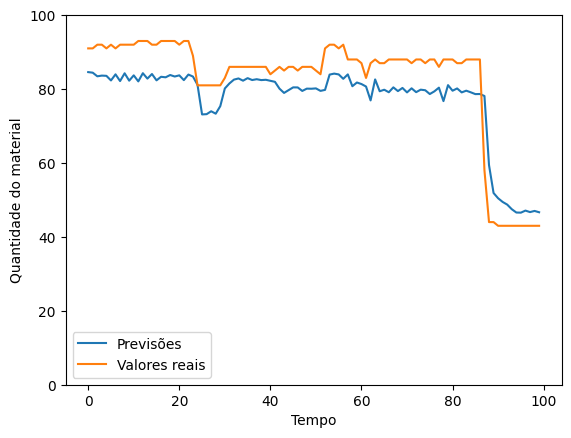

In [ ]:
plot_predictions1(model, X_test, y_test)

45/45 [==============================] - 0s 7ms/step
MAE: 10.623922314395017
RMSE: 13.425112330731853
SMAPE 7.41837027430703
Mape 13.009285194574131


,F2 Predictions,F2 Actuals
0,76.171021,86.0
1,75.651642,83.0
2,72.960152,87.0
3,75.382141,87.0
4,73.117310,87.0
...,...,...
95,83.111160,86.0
96,84.313766,86.0
97,83.908638,86.0
98,84.060684,86.0


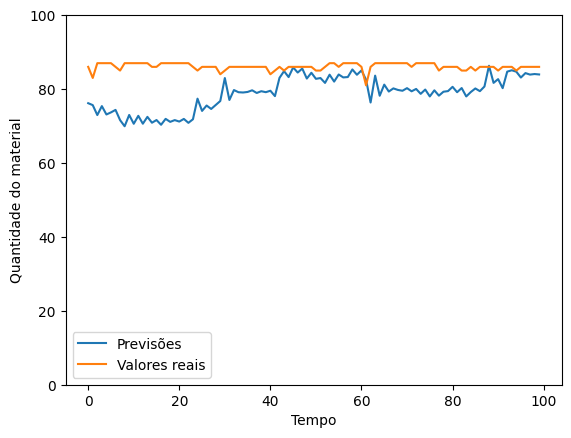

In [ ]:
plot_predictions2(model, X_test, y_test)

45/45 [==============================] - 0s 7ms/step
MAE: 7.533634562628562
RMSE: 10.54721775599676
SMAPE 31.224737310200275
Mape inf


,F3 Predictions,F3 Actuals
0,66.871025,76.0
1,65.875366,71.0
2,60.733784,70.0
3,61.540424,70.0
4,61.763401,71.0
...,...,...
95,74.380234,73.0
96,73.894104,73.0
97,74.108513,73.0
98,73.973534,73.0


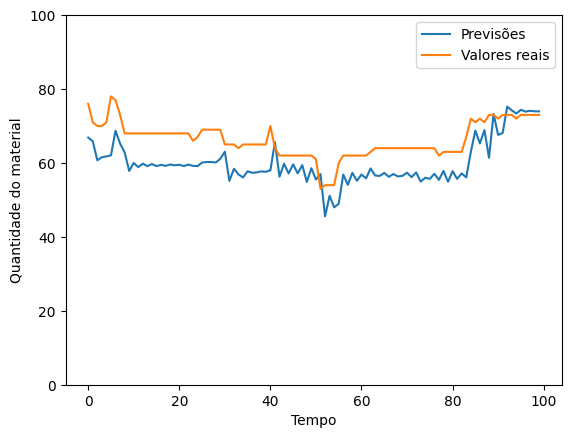

In [ ]:
plot_predictions3(model, X_test, y_test)

45/45 [==============================] - 0s 8ms/step
MAE: 9.954525330843476
RMSE: 14.675038057449354
SMAPE 12.59050386840545
Mape inf


,F6 Predictions,F6 Actuals
0,80.590157,88.0
1,79.456779,88.0
2,83.010902,88.0
3,82.407867,87.0
4,80.412849,88.0
...,...,...
95,33.027817,18.0
96,34.490017,18.0
97,33.921303,18.0
98,34.088310,18.0


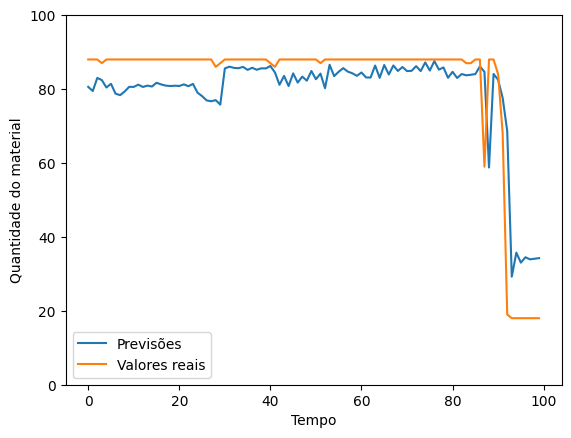

In [ ]:
plot_predictions4(model, X_test, y_test)

45/45 [==============================] - 0s 7ms/step
MAE: 5.150139579820028
RMSE: 10.207812498742623
SMAPE 7.861742290142904
Mape inf


,F8 Predictions,F8 Actuals
0,0.735011,0.0
1,0.667904,0.0
2,1.363412,0.0
3,0.922191,0.0
4,0.567514,0.0
...,...,...
95,68.962006,68.0
96,70.625511,68.0
97,69.913872,68.0
98,70.164818,68.0


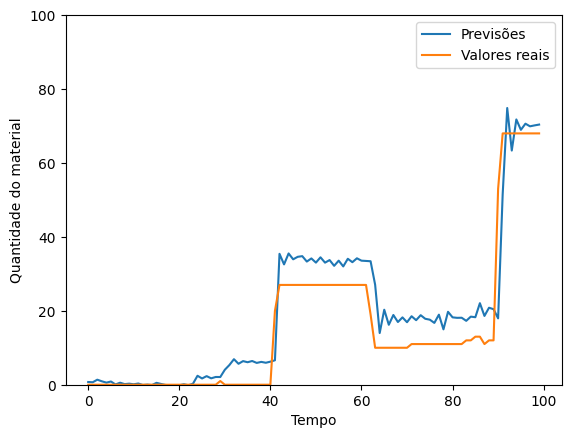

In [ ]:
plot_predictions5(model, X_test, y_test)

45/45 [==============================] - 0s 8ms/step
MAE: 10.859712378158061
RMSE: 14.279638587215016
SMAPE 61.10869643298234
Mape inf


,F9 Predictions,F9 Actuals
0,30.336279,33.0
1,28.913652,33.0
2,30.174526,33.0
3,30.807148,25.0
4,26.649899,24.0
...,...,...
95,84.779434,89.0
96,84.228615,89.0
97,84.536728,89.0
98,84.513374,89.0


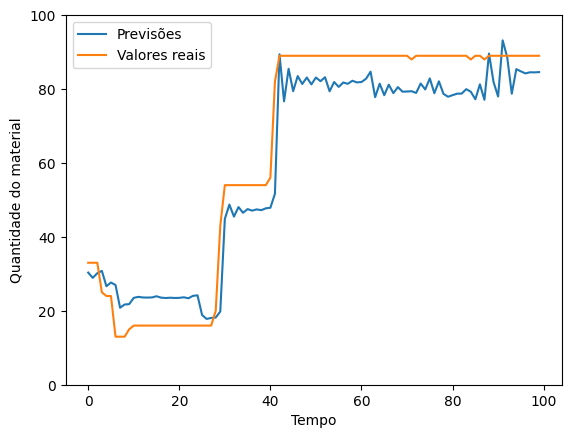

In [ ]:
plot_predictions6(model, X_test, y_test)

45/45 [==============================] - 0s 8ms/step
MAE: 8.25633410372271
RMSE: 12.892345151993526
SMAPE 62.77546860179258
Mape inf


,F10 Predictions,F10 Actuals
0,32.867126,15.0
1,21.965364,18.0
2,32.054329,21.0
3,32.169994,21.0
4,30.197647,21.0
...,...,...
95,27.796976,18.0
96,27.603958,18.0
97,27.739141,18.0
98,27.559258,19.0


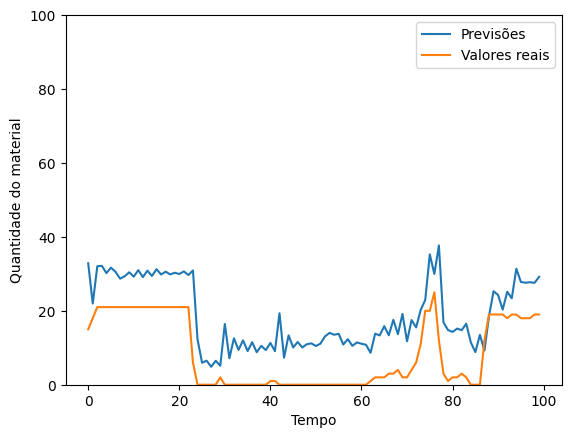

In [ ]:
plot_predictions7(model, X_test, y_test)

45/45 [==============================] - 0s 7ms/step
MAE: 6.349419893767837
RMSE: 11.220983513210172
SMAPE 3.965359325701954
Mape 7.176526800287888


,F13 Predictions,F13 Actuals
0,102.785210,96.0
1,99.736023,96.0
2,103.013527,96.0
3,101.526497,96.0
4,102.400452,96.0
...,...,...
95,94.559372,96.0
96,95.221512,96.0
97,94.668846,96.0
98,94.979950,96.0


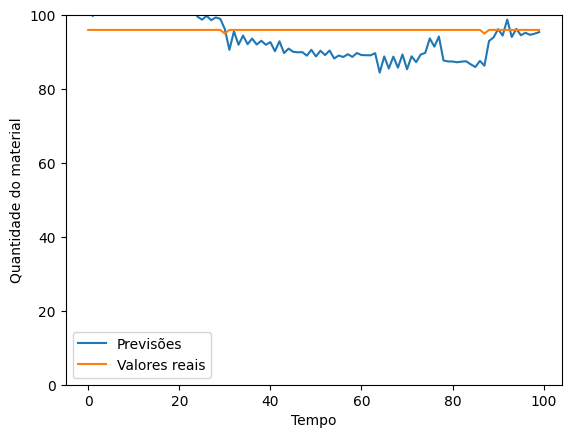

In [ ]:
plot_predictions8(model, X_test, y_test)

45/45 [==============================] - 0s 8ms/step
MAE: 3.977462130978346
RMSE: 7.473270879605819
SMAPE 2.903758429973456
Mape 5.132525578957439


,F14 Predictions,F14 Actuals
0,95.015823,90.0
1,93.765610,90.0
2,94.374718,90.0
3,93.170074,90.0
4,90.998627,90.0
...,...,...
95,98.760162,93.0
96,98.358543,93.0
97,98.451942,93.0
98,98.497093,93.0


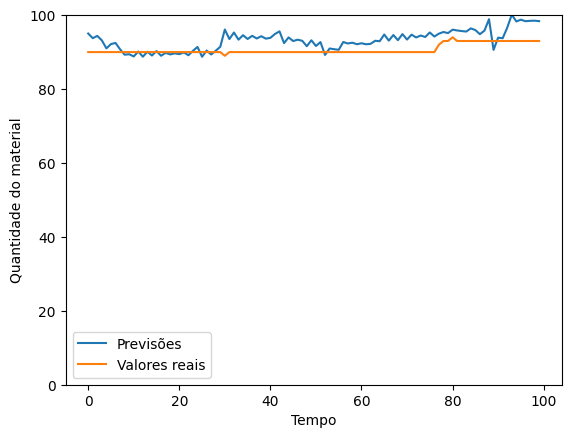

In [ ]:
plot_predictions9(model, X_test, y_test)

45/45 [==============================] - 0s 8ms/step
MAE: 3.910253941760581
RMSE: 7.030795906670769
SMAPE 2.8263973284099544
MAPE 4.611009508662194


,F15 Predictions,F15 Actuals
0,92.316711,94.0
1,92.723297,94.0
2,92.777786,94.0
3,92.793228,94.0
4,92.596252,94.0
...,...,...
95,91.889465,94.0
96,91.784096,94.0
97,91.934319,94.0
98,91.847488,94.0


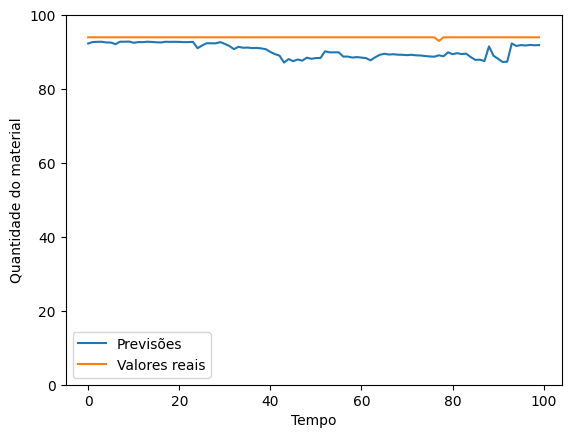

In [ ]:
plot_predictions10(model, X_test, y_test)

45/45 [==============================] - 0s 7ms/step
MAE: 9.484872240778085
RMSE: 13.691186450162006
SMAPE 11.246909039404429
Mape inf


,F16 Predictions,F16 Actuals
0,88.609596,91.0
1,89.941429,91.0
2,88.372490,91.0
3,89.066612,91.0
4,88.482422,91.0
...,...,...
95,85.720963,90.0
96,85.521782,90.0
97,86.280319,90.0
98,85.521751,90.0


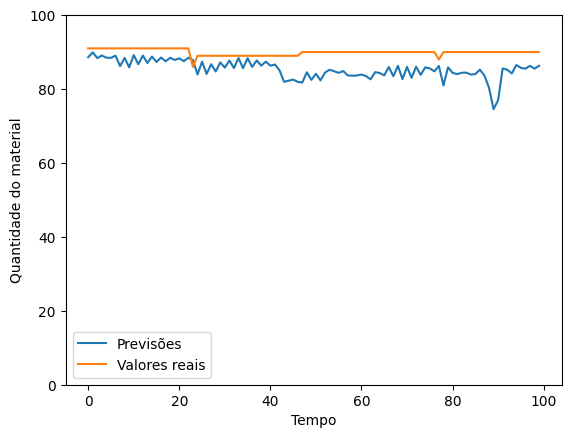

In [ ]:
plot_predictions11(model, X_test, y_test)

45/45 [==============================] - 0s 8ms/step
MAE: 7.189688818263907
RMSE: 12.238886804604446
SMAPE 9.57049529629439
Mape inf


,F17 Predictions,F17 Actuals
0,92.591095,97.0
1,92.506317,97.0
2,92.011551,97.0
3,92.411751,97.0
4,90.982552,97.0
...,...,...
95,98.987297,95.0
96,98.118347,95.0
97,98.714310,95.0
98,98.247559,95.0


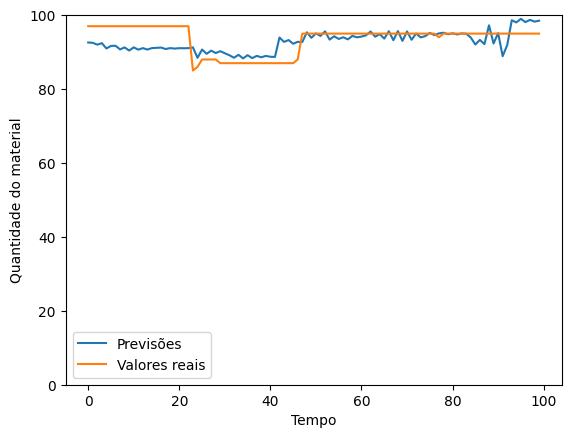

In [ ]:
plot_predictions12(model, X_test, y_test)

45/45 [==============================] - 0s 7ms/step
MAE: 10.817149443417915
RMSE: 15.164529122198196
SMAPE 6.711426160260697
Mape 13.768819978025503


,F18 Predictions,F18 Actuals
0,92.777962,98.0
1,93.371384,98.0
2,93.044014,98.0
3,92.999084,98.0
4,93.533546,98.0
...,...,...
95,101.709610,88.0
96,101.769951,88.0
97,101.773788,88.0
98,101.808563,88.0


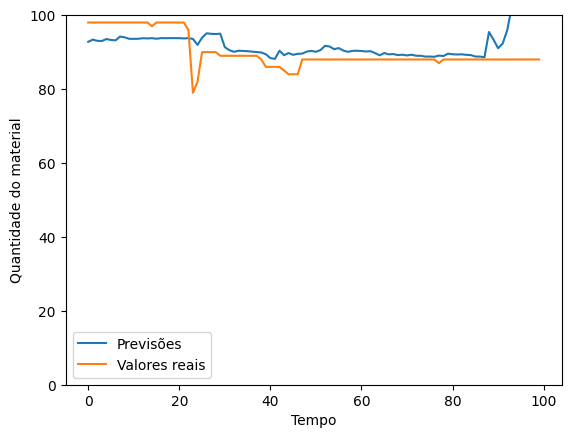

In [ ]:
plot_predictions13(model, X_test, y_test)